# <font color='#d35400'> Lab 6 | Statistical Exploratory Data Analysis </font>
Welcome to Lab 6! The goal in lab 6 is to use hypothesis testing to conduct a exploratory data analysis. To achieve this, we consider life expectancy, but this time we work with a new data set of US county level information. The goal will be to work with a response variable and explore which variables might make good predictors for this response.

<p align="center">
  <img src="tennis_dog.jpg" alt="Alt Text", width="300"/>
</p>

### <font color='#FF8C00'> About the Dataset </font>
We start off the Jupyter Notebook by exploring the dataset. Since it is in a `.json` format, we convert it into a `pandas` data frame, and then perform the necessary statistical calculations, such as using `.info()` and `.describe()`. To achieve this, we make sure we do all the necessary imports that we need.

In [1]:
# importing the pandas library
import pandas as pd

# converting the .json file into a pandas data frame
county_df = pd.read_json("counties.json")

# displaying the counties data frame of the first row
county_df.head(1)

name   fips state  land_area (km^2)  area (km^2)  longitude (deg)  \
0  cuming county  31039    NE       1477.641638  1488.343176       -96.787366   

   latitude (deg)                                               noaa  \
0       41.916346  {'prcp': 30.5, 'snow': 28.2, 'temp': 48.8, 'al...   

                                           zip-codes  \
0  [68047, 68641, 68004, 68045, 68788, 68716, 687...   

                                                race  ... avg_income  \
0  {'non_hispanic_white_alone_male': 0.4379380510...  ...      58610   

                                        covid-deaths  \
0  {'2020-02-01': 0, '2020-03-01': 0, '2020-04-01...   

                                     covid-confirmed  \
0  {'2020-02-01': 0, '2020-03-01': 0, '2020-04-01...   

                                   covid-vaccination  \
0  {'2021-01-01': 0.0, '2021-02-01': 61.4, '2021-...   

                                           elections  \
0  {'2008': {'total': 4087, 'dem': 1274, 'gop': 2...   

                                                 edu  poverty-rate  \
0  {'less-than-high-school': 11.6, 'high-school':...           8.9   

                                      cost-of-living  \
0  {'living_wage': 12.89, 'food_costs': 3246.0, '...   

                                            industry  \
0  {'Construction': {'payroll': 8307000, 'employe...   

                                              health  
0  {'% Fair or Poor Health': 14.590580443, 'Avera...  

[1 rows x 29 columns]

In [2]:
# importing the ipython library
from IPython.display import display

# displaying the descriptive statistics of the data frame
display("Summary Statistics: ", county_df.info())

# displaying the summary of the dataset
display("Description of Dataset: ", county_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3142 non-null   object 
 1   fips                    3142 non-null   int64  
 2   state                   3142 non-null   object 
 3   land_area (km^2)        3142 non-null   float64
 4   area (km^2)             3142 non-null   float64
 5   longitude (deg)         3142 non-null   float64
 6   latitude (deg)          3142 non-null   float64
 7   noaa                    3142 non-null   object 
 8   zip-codes               3142 non-null   object 
 9   race                    3142 non-null   object 
 10  age                     3142 non-null   object 
 11  male                    3142 non-null   int64  
 12  female                  3142 non-null   int64  
 13  population              3142 non-null   object 
 14  deaths                  3142 non-null   

'Summary Statistics: '

None

'Description of Dataset: '

fips  land_area (km^2)    area (km^2)  longitude (deg)  \
count   3142.000000       3142.000000    3142.000000      3142.000000   
mean   30383.652769       2911.729752    3140.236735       -92.293441   
std    15162.512005       9360.572636    9960.549977        12.975221   
min     1001.000000          5.300264       5.300296      -175.687790   
25%    18177.500000       1115.844505    1154.514541       -98.233756   
50%    29176.000000       1595.516194    1687.209285       -90.394740   
75%    45080.500000       2393.159486    2552.865615       -83.430980   
max    56045.000000     377030.936019  382984.116616       -67.608136   

       latitude (deg)          male        female  life-expectancy  \
count     3142.000000  3.142000e+03  3.142000e+03      3142.000000   
mean        38.455993  5.145045e+04  5.301789e+04        77.750662   
std          5.304694  1.638677e+05  1.696276e+05         2.382180   
min         19.593667  4.100000e+01  4.500000e+01        66.810000   
25%         34.696344  5.459750e+03  5.407250e+03        76.100000   
50%         38.380621  1.286900e+04  1.282850e+04        77.935000   
75%         41.819157  3.415225e+04  3.451250e+04        79.490000   
max         69.377717  4.949041e+06  5.090066e+06        86.830000   

       police_deaths     avg_income  poverty-rate  
count    3142.000000    3142.000000   3141.000000  
mean        0.017187   44188.344685     14.455333  
std         0.139440   12761.680107      5.799981  
min         0.000000   18541.000000      2.700000  
25%         0.000000   36584.250000     10.400000  
50%         0.000000   41974.000000     13.400000  
75%         0.000000   48821.500000     17.500000  
max         3.000000  251728.000000     47.700000

According to `.info()`, we can see that some of the data types that the columns have are `int64`, `float64` and `object`. According to `.describe()`, we can see the following count, mean, standard deviation and more in the table above this cell.

### <font color='#FF8C00'> JSON to Excel & CSV </font>
We would like to convert the .json file into a excel and .csv file, and then download these files directly into the directory. This will allow us to examine the dataset better, seeing what columns exist as well as other things.

In [3]:
# converting the .json to a .csv file
county_df.to_csv("counties.csv", encoding='utf-8', index=False)

# converting the .json to a excel file
county_df.to_excel("counties.xlsx", index=False)

## <font color = '#FF8C00'> Section 1 </font> | Data Preparation
In this section, we load the `counties.csv` file into a Pandas data frame using `pd.read_csv()`. We perform basic feature engineering by creating new columns for COVID-19 deaths and confirmed cases per capita, an indicator for above-average life expectancy, the largest industry by employees and the most common educational level in each country. To achieve this, we perform the following steps:
- [x] Divide the number of covid deaths in each county in 2022-03-01 by the 2019 population – add a column called covid-deaths total per capita containing this data to the dataframe. 
- [x] Divide the number of covid confirmed cases in each county in 2022-03-01 by the 2019 population – add a column called covid-confirmed total per capita containing this data to the dataframe.
- [x] Create an indicator that measures whether a county has greater-than-average life expectancy. Add a column called above average life-expectancy containing this data to the dataframe.
- [x] Record for each county the largest industry by number of employees. You will need to use the 20 variables in the data named industry/.../employees. To do this, you will need to ﬁll missing values in these variables. For simplicity, ﬁll missing values with 0 (you may ﬁnd .ﬁllna useful). Put this information into a single column called biggest industry.
- [x] Record for each county the modal educational level. You will need to use the 4 variables in the data named edu/.... Put this information into a single column called county_modal_ed.

### <font color = '#FF8C00'> COVID Deaths </font>
We start this section off by dividing the number of covid deaths in each country in March 1, 2022 by the 2019 population. We then add a column called `covid-deaths_total_per_capita` that contains this data to the dataframe.

In [4]:
# using json_normalize to normalize semi-structured data into a flat table
death_df = pd.json_normalize(county_df["covid-deaths"])
population_df = pd.json_normalize(county_df["population"])

# extracting relevant data from both columns
death_df.columns = death_df.columns.map(lambda x: x.split(".")[-1])
population_df.columns = population_df.columns.map(lambda x: x.split(".")[-1])

In [5]:
# checking length of the 2022-03-01 column
death_length = len(death_df['2022-03-01'])
print("Number of Death Observations: ", death_length)

# checking length of the 2019 column
year_length = len(population_df['2019'])
print("Number of 2019 Observations: ", year_length)

# converting the columns into a list
death_list = death_df['2022-03-01'].tolist()
population_list = population_df['2019'].tolist()

# dividing covid deaths by the 2019 population
death_by_year_list = [death / year for death, year in zip(death_list, population_list)]

# adding the list as a column to a data frame
county_df['covid-deaths_total_per_capita'] = death_by_year_list

Number of Death Observations:  3142
Number of 2019 Observations:  3142


### <font color = '#FF8C00'> COVID Confirms </font>
Next, we move on to dividing the number of covid confirmed cases in each county in 2022-03-01 by the 2019 population. We add a column called `above_average_life_expectancy` containing this data to the data frame.

In [6]:
# using json_normalize to normalize semi-structured data into a flat table
confirm_df = pd.json_normalize(county_df['covid-confirmed'])

# converting the data frame column into a list
confirm_list = confirm_df['2022-03-01'].tolist()

# checking the length of the confirm list
print("Number of Covid Confirmed Observations: ", len(confirm_list))

# dividing covid confirms by the 2019 population
confirm_by_year_list = [confirm / year for confirm, year in zip(confirm_list, population_list)]

# adding the list as a column to a data frame
county_df['covid-confirmed_total_per_capita'] = confirm_by_year_list

Number of Covid Confirmed Observations:  3142


### <font color = '#FF8C00'> Life Expectancy Indicator </font>
Next, we move on creating a indicator, with regards to whether a county has a greater than average life expectancy. We then add a column called `above_average_life-expectancy` to the data frame.

In [7]:
# importing the numpy library
import numpy as np

# calculating the average of the life expectancy feature
average_life_expectancy = np.mean(county_df['life-expectancy'])
print("Average Life Expectancy: ", average_life_expectancy)
print("Length of Life Expectancy List: ", len(county_df['life-expectancy']))

# converting into a list
life_expectancy_list = county_df['life-expectancy']

# evaluating if a county has a above average life expectancy or not
evaluation_list = []
for index in range(0, len(life_expectancy_list)):
    if(life_expectancy_list[index] > average_life_expectancy):
        evaluation_list.append(True)
    else:
        evaluation_list.append(False)

# checking the length of the evaluation list 
print("Length of Evaluation List: ", len(evaluation_list))

# appending the evaluation list as a column
county_df['above_average_life-expectancy'] = evaluation_list

Average Life Expectancy:  77.75066199872693
Length of Life Expectancy List:  3142
Length of Evaluation List:  3142


### <font color = '#FF8C00'> Largest Industry </font>
Next, we move on recording for each country the largest industry by the number of employees. Once we find the industry, we put this information into a single column called `biggest_industry`.

In [8]:
# using json_normalize to normalize semi-structured data into a flat table
industry_df = pd.json_normalize(county_df['industry'])

# filling in the missing values in the data frame using just 0
industry_df.fillna(0, inplace=True)

# dropping all the columns ending with .payroll
for column in industry_df.columns:
    if column.endswith('.payroll'):
        industry_df.drop(column, axis=1, inplace=True)

# setting up a list of industries with higheest number of employees
high_employment_industry = []

# finding the indsutry with the highest number of employees
for index in range(0, len(industry_df)):
    row = industry_df.iloc[index]
    column_name = row.idxmax()
    high_employment_industry.append(column_name)

# setting up a list of industry names
industry_list = []

# performing string slicing to get just the industry
for industry in high_employment_industry:
    dot_position = industry.rfind('.')
    industry_name = industry[:dot_position]
    industry_list.append(industry_name)

# checking the length of the industry list
print("Length of Insutry Names: ", len(industry_list))

# adding the names of the indsutries to the data frame
county_df['biggest_industry'] = industry_list

Length of Insutry Names:  3142


### <font color = '#FF8C00'> Education Level </font>
Next, we record for each county the modal educational level. We need to use the 4 variables in the data. We then put this information into a single column called `county_modal_ed`.


In [9]:
# using json_normalize to normalize semi-structured data into a flat table
education_df = pd.json_normalize(county_df['edu'])

# setting up a list of education levels
education_level_list = []

# finding the modal education level using a for loop
for index in range(0, len(education_df)):
    row = education_df.iloc[index]
    column_name = row.idxmax()
    education_level_list.append(column_name)

# checking the length of the education levels
print("Length of Education Levels: ", len(education_level_list))

# adding the education levels to the data frame
county_df['county_modal_ed'] = education_level_list

Length of Education Levels:  3142


### <font color = '#FF8C00'> Checking for Presence of Columns </font>
Lastly, we would like to check for the presence of the columns we created.

In [10]:
# checking for the presence of the columns we created
column_list = ['covid-deaths_total_per_capita', 'covid-confirmed_total_per_capita',
               'above_average_life-expectancy', 'biggest_industry', 
               'county_modal_ed']
result = all(column in county_df.columns for column in column_list)

# printing out the results
if result:
    print("All Columns Exist!")
else:
    print("The Columns Don't Exist!")

All Columns Exist!


### <font color='#FF8C00'> Sources Used For Section One </font>
- https://stackoverflow.com/questions/34341974/nested-json-to-pandas-dataframe-with-specific-format
- https://stackoverflow.com/questions/12604909/pandas-how-to-change-all-the-values-of-a-column
- https://stackoverflow.com/questions/78157298/load-convert-json-to-excel-with-pandas-in-python
- https://stackoverflow.com/questions/24870306/how-to-check-if-a-column-exists-in-pandas
- https://www.reddit.com/r/learnpython/comments/q5e07m/pandas_fillna_replacing_every_value_with_nan/
- https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-a-pandas-dataframe
- https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
- https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe
- https://www.geeksforgeeks.org/python-find-position-of-a-character-in-given-string/
- https://www.geeksforgeeks.org/string-slicing-in-python/

### <font color='#FF8C00'> Section One Answers </font>
Q1 | When we constructed the above_average_life-expectancy indicator, was it appropriate to use the mean for this purpose?

Yes, that would be the case. Whenever we use terms such as "average", this often indicates that we're taking the mean of the dataset that we're looking at. When we constructed the above_average_life-expectancy indicator, we wanted to look at the average life expectancy of all counties combined in the United States, and then compare the computed total average against the life expectancy in each county to see if it was below average or above average. As a result, it would be fair game to assume it is appropriate.

Q2 | When we constructed the above_average_life-expectancy indicator, how could you have used hypothesis testing to build this variable? If you had, how many categories would it have?

With regards to using hypothesis testing, we could have modeled the situation as follows:
Null Hypothesis: the life expectancy of the county is equal to the national average 
Alternative Hypothesis: the life expectancy of the county is below the national average
The type of hypothesis testing we could use is one sample t-test, because we're comparing the national mean of life expectancy against the life expectancy of different counties. 
Using the hypothesis testing we have, this would mean we have two categories of counties. The first category is the counties which have a life expectancy equal to the national average, and the other is the life expectancy of the county below the national average.


Q3 | What are we implicitly assuming by filling the missing values with 0 when we create the largest industry variable?

To fill missing values with zero means that it will not cause significant bias when it comes to calculating the mean, variance or standard deviation of that certain sample or dataset. A missing value also might implicitly imply that there are zero workers in that certain industry.

## <font color = '#FF8C00'> Section 2 </font> | Life Expectancy
In this section, we will analyze the relationship between life expectancy and various numerical predictors using Pearson's correlation and tested categorical associations with the Kruskal-Wallis test. The results would indicate which variables have statistically significant relationships with life expectancy $\alpha$ = 0.05, which provides insight into key factors including county-level differences. We achieve this in the following steps:
- [x] In this section we are going to explore which variables are predictive of US county level life expectancy. Thus we will be using life-expectancy as our dependent variable, and we focus on other variables as potential predictors
- [x] For each numerical potential predictor variable, use scipy.stats.linregress() to estimate the Pearson’s correlation coefficient and the statistical significance (p-value) of the correlation against the life-expectancy variable
- [x] We can test for association between categorical and numerical variables using a Kruskal-Wallis test via the scipy.kruskal() function
- [x] In a single table, indicate the variable name, test statistic, p-value, and whether there is a statistically significant relationship between that variable and life-expectancy at a threshold of α = 0.05, using all the hypothesis tests conducted in 2.2 and 2.3.

### <font color = '#FF8C00'> Linear Regression </font>
For each numerical predictor, we use `scipy.stats.linregress()` to estimate the Pearson's correlation coefficient and the statistical signfigiance of the correlation against the life-expectancy variable. We then take those results to build a single table that indicates the variable name, test statistic and life-expectancy at a threshold of $/alpha$ = 0.05 using the hypothesis tests conducted.

In [11]:
# using json_normalize to normalize semi-structured data into a flat table
noaa_df = pd.json_normalize(county_df['noaa'])
deaths_df = pd.json_normalize(county_df['deaths'])
bls_df = pd.json_normalize(county_df['bls'])
vaccination_df = pd.json_normalize(county_df['covid-vaccination'])
cost_of_living_df = pd.json_normalize(county_df['cost-of-living'])
health_df = pd.json_normalize(county_df['health'])

In [12]:
# importing the statistics library from scipy
import scipy.stats

# building a function that returns the name, test statistic and p-value
def linear_regression_function(feature_one, feature_two):

    if feature_two.isnull().any():
        null_rows = feature_two[feature_two.isnull()].index.tolist()
        feature_one = feature_one.drop(null_rows)
        feature_two = feature_two.drop(null_rows)

    # calculating the linear regression
    linear_regression = scipy.stats.linregress(feature_one, feature_two)

    # calculating the test statisic, p-value and r-value
    t_value = linear_regression.slope / linear_regression.stderr
    p_value = linear_regression.pvalue
    r_value = linear_regression.rvalue
    statistical_signifigance = False

    # setting up bonferroni and bonferroni alpha
    alpha = 0.05
    bonferroni_alpha = alpha / 52

    # whether statistically significant or not
    if p_value < bonferroni_alpha:
        statistical_signifigance = True
    
    # return everything
    return t_value, p_value, r_value, statistical_signifigance

In [13]:
# extracting the necessary data we need to pass in to our function
dataframe_features = [
    county_df['longitude (deg)'],
    county_df['latitude (deg)'],
    noaa_df['temp'],
    noaa_df['altitude'],
    county_df['male'],
    deaths_df['suicides'],
    deaths_df['homicides'],
    bls_df['2020.unemployed'],
    county_df['avg_income'],
    county_df['covid-deaths_total_per_capita'],
    county_df['covid-confirmed_total_per_capita'],
    vaccination_df['2021-12-01'],
    county_df['poverty-rate'],
    cost_of_living_df['living_wage'],
    cost_of_living_df['food_costs'],
    cost_of_living_df['medical_costs'],
    cost_of_living_df['housing_costs'],
    cost_of_living_df['tax_costs'],
    health_df['Average Number of Mentally Unhealthy Days'],
    health_df['% Smokers'],
    health_df['% Adults with Obesity'],
    health_df['% Physically Inactive'],
    health_df['% Long Commute - Drives Alone'],
]

# creating a list of all the variables for the table
variable_names = [
    'longitude (deg)', 
    'latitude (deg)', 
    'temp', 
    'altitude', 
    'male', 
    'suicides', 
    'homicides',
    '2020.unemployed', 
    'avg_income', 
    'covid-deaths_total_per_capita', 
    'covid-confirmed_total_per_capita', 
    'vaccination.2021-12-01', ''
    'poverty-rate', 
    'living_wage', 
    'food_costs', 
    'medical_costs', 
    'housing_costs',
    'tax_costs', 
    'Average Number of Mentally Unhealthy Days', 
    '% Smokers',
    '% Adults with Obesity',
    '% Physically Inactive', 
    '% Long Commute - Drives Alone',
]


In [14]:
# instantiating a number of lists
t_values_list = []
p_values_list = []
r_values_list = []
signifigance_list = []

# running the function in a for loop and storing the results
for feature in dataframe_features:
    
    # retrieving all the necessary daya
    t_value, p_value, r_value, statistical_signifigance = linear_regression_function(county_df['life-expectancy'], 
                                                                                     feature)
    
    # appending to the instantiated lists
    t_values_list.append(t_value)
    p_values_list.append(p_value)
    r_values_list.append(r_value)
    signifigance_list.append(statistical_signifigance)

In [15]:
# creating a dicationary 
data_numerical = {
    'Variable Name': variable_names,
    'Test Statistic': t_values_list,
    'P-Value': p_values_list,
    'r-Value': r_values_list,
    "Statistically Significant": signifigance_list
}

# converting dicationary to data frame
numerical_df = pd.DataFrame(data_numerical)

# displaying the data frame as a table
display(numerical_df)

Variable Name  Test Statistic        P-Value  \
0                             longitude (deg)      -10.549703   1.358906e-25   
1                              latitude (deg)       27.255320  5.304361e-147   
2                                        temp      -30.046768  1.463919e-174   
3                                    altitude       15.650003   3.235692e-53   
4                                        male        9.709380   5.584895e-22   
5                                    suicides        9.414545   9.216754e-21   
6                                   homicides        4.143451   3.552415e-05   
7                             2020.unemployed        8.069614   9.946132e-16   
8                                  avg_income       38.298671  1.111643e-263   
9               covid-deaths_total_per_capita      -31.072288  4.616175e-185   
10           covid-confirmed_total_per_capita      -15.200018   2.107299e-50   
11                     vaccination.2021-12-01        8.176386   4.197836e-16   
12                               poverty-rate      -54.793435   0.000000e+00   
13                                living_wage       21.421593   3.941282e-95   
14                                 food_costs       22.636483  3.226331e-105   
15                              medical_costs       -9.044944   2.560844e-19   
16                              housing_costs       20.814251   3.046873e-90   
17                                  tax_costs       12.428512   1.179789e-34   
18  Average Number of Mentally Unhealthy Days      -65.001113   0.000000e+00   
19                                  % Smokers      -61.225718   0.000000e+00   
20                      % Adults with Obesity      -30.831628  1.420991e-182   
21                      % Physically Inactive      -44.704013   0.000000e+00   
22              % Long Commute - Drives Alone       -8.420080   5.643566e-17   

     r-Value  Statistically Significant  
0  -0.185017                       True  
1   0.437397                       True  
2  -0.472559                       True  
3   0.268992                       True  
4   0.170727                       True  
5   0.170174                       True  
6   0.088597                       True  
7   0.142672                       True  
8   0.564267                       True  
9  -0.484943                       True  
10 -0.261795                       True  
11  0.144385                       True  
12 -0.699194                       True  
13  0.357082                       True  
14  0.374558                       True  
15 -0.159351                       True  
16  0.348201                       True  
17  0.216534                       True  
18 -0.757460                       True  
19 -0.737735                       True  
20 -0.482122                       True  
21 -0.623696                       True  
22 -0.148618                       True

In [16]:
# importing the seaborn library
import seaborn as sns

# importing the matplotlib library
import matplotlib.pyplot as plt

# method for graphing the numerical variables against each other
def graph_linear_regression(feature_one, feature_two, ax):

    # plotting the scatter plot
    sns.scatterplot(x=feature_one, y=feature_two, hue=feature_two, palette="viridis", ax=ax)

    # setting up the plot details
    plot_title = feature_one.name + " vs " + feature_two.name
    ax.set_title(plot_title)
    ax.set_xlabel(feature_one.name)
    ax.set_ylabel(feature_two.name)

### <font color = '#FF8C00'> Graphing the Linear Regression </font>
Laslty, we use the `seaborn` and the `matplotlib` library to graph out a scatterplot as we're dealing with graphical a numerical variable against a numerical variable.

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\GitHub\\DataScience\\wk_07\\plots\\LinearRegression.png'

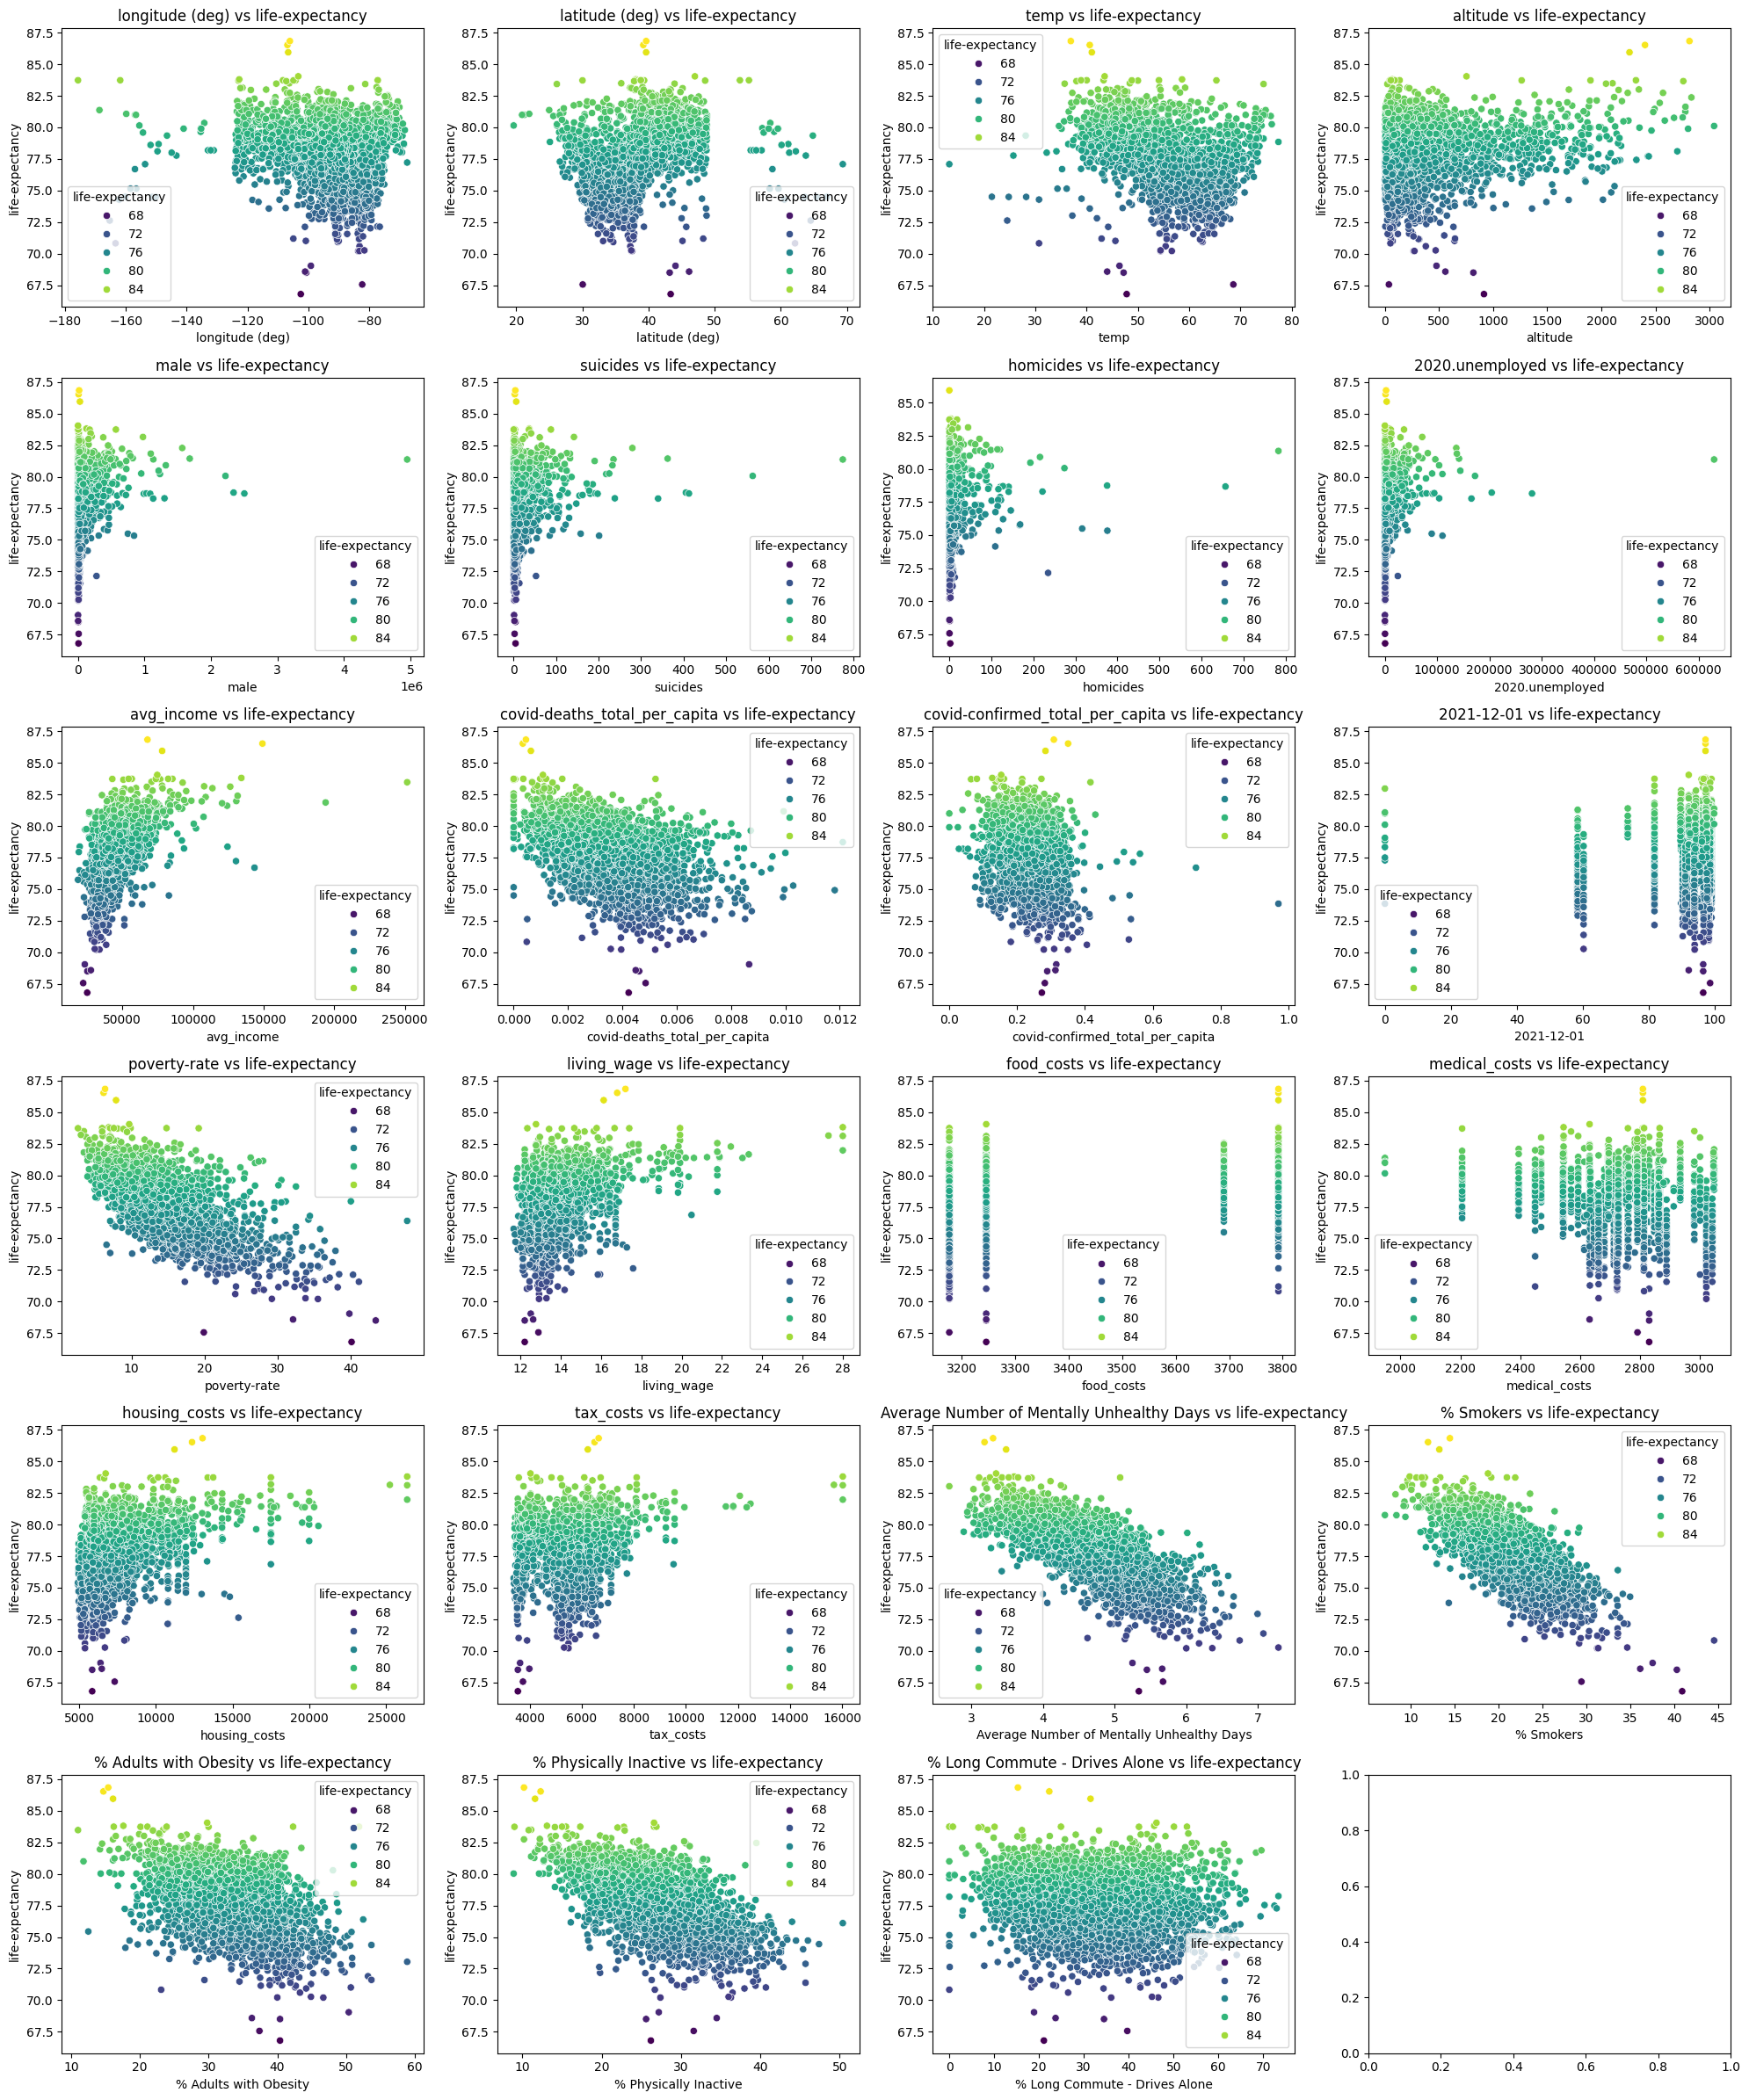

In [17]:
# setting the number of rows and columns
rows = 6
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 24)) 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, feature in enumerate(dataframe_features):
    if i < len(axes):  
        graph_linear_regression(feature, county_df['life-expectancy'], axes[i])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_07\plots\LinearRegression.png")

plt.show()

### <font color = '#FF8C00'> Association Test </font>
Lastly, we would like to test for association between categorical and numerical variables using a Kruska-Wallis test. The numerical variable we use here is the `life-expectancy` variable.

In [18]:
# importing the kruskal function
from scipy.stats import kruskal

# creating a list of categorical features
categorical_features = [
    county_df['state'],
    county_df['county_modal_ed'],
    county_df['biggest_industry']
]

# creating a list of variable names for the table
categorical_names = [
    'state',
    'county_modal_ed',
    'biggest_indsutry'
]

In [19]:
# creating a function that performs kruskal-wallis
def kruskal_wallis(feature_one, feature_two):

    if feature_two.isnull().any():
        null_rows = feature_two[feature_two.isnull()].index.tolist()
        feature_one = feature_one.drop(null_rows)
        feature_two = feature_two.drop(null_rows)

    # creating a list
    samples_by_group = []

    # setting up the for loop
    for value in set(feature_one):
        mask = feature_one == value
        samples_by_group.append(feature_two[mask])
    
    # getting the statistics and probability
    statistic, probability = kruskal(*samples_by_group)

    # instatiating the statistical signfigance variable
    statistical_signifigance = False

    # setting up bonferroni and bonferroni alpha
    alpha = 0.05
    bonferroni_alpha = alpha / 52

    # whether statistically significant or not
    if probability < bonferroni_alpha:
        statistical_signifigance = True

    # returning the statistics and probability
    return statistic, probability, statistical_signifigance

In [20]:
# instatiating the lists to append to
statistic_list = []
probability_list = []
hypothesis_list = []

# setting up a for loop to retrieve the necessary values
for category in categorical_features:
    statistic, probability, statistical_signifigance = kruskal_wallis(category, county_df['life-expectancy'])
    statistic_list.append(statistic)
    probability_list.append(probability)
    hypothesis_list.append(statistical_signifigance)

In [21]:
# creating a dicationary 
data_categorical = {
    'Variable Name': categorical_names,
    'Test Statistic': statistic_list,
    'P-Value': probability_list,
    "Statistically Significant": hypothesis_list
}

# converting dicationary to data frame
categorical_df = pd.DataFrame(data_categorical)

# displaying the data frame as a table
display(categorical_df)

Variable Name  Test Statistic        P-Value  Statistically Significant
0             state     1719.974217   0.000000e+00                       True
1   county_modal_ed      741.857305  1.759615e-160                       True
2  biggest_indsutry      168.012083   6.947819e-27                       True

### <font color = '#FF8C00'> Graphing the Association Test </font>
Now, we use the `seaborn` and `matplotlib` library to graph out box plots. The reason we use a box plot is because we're graphing out a categorical variable against a numerical variable.

In [ ]:
# method for graphing a numerical variable against a categorical variable
def graph_association_test(feature_one, feature_two, ax):

    # plotting the scatter plot
    sns.boxplot(x=feature_one, y=feature_two, ax=ax)

    # setting up the plot details
    plot_title = feature_one.name + " vs " + feature_two.name
    ax.set_title(plot_title)
    ax.set_xlabel(feature_one.name)
    ax.set_ylabel(feature_two.name)

In [ ]:
# setting the number of rows and columns
rows = 1
columns = 3

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 6)) 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, feature in enumerate(categorical_features):
    if i < len(axes):  
        graph_association_test(county_df['life-expectancy'], feature, axes[i])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_07\plots\AssociationTest.png")

# displaying the plot
plt.show()


### <font color='#FF8C00'> Sources Used For Section Two </font>
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
- https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/
- https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
- https://stackoverflow.com/questions/73803147/find-the-row-numbers-in-a-dataframe-if-one-or-more-than-one-columns-in-a-row-h
- https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame


### <font color='#FF8C00'> Section Two Answers </font>
Q4 | Explain what it means to reject the null hypothesis in a Pearson's Correlation Coefficient Hypothesis Test

To reject the null hypothesis in a Pearson's Correlation Coefficient Hypothesis Test means that there is evidence to claim that there is a significant linear relationship between the two variables being tested. Furthermore, it also means that there is a statistically significant result.
 The Null & Alternative hypothesis is as follows:
Null Hypothesis: there is no linear relationship between the two variables
Alternative Hypothesis: there is a significant linear relationship between the two variables

Q5 | Discuss the meaning of Pearsons's Correlation Coefficient Values obtained in your analysis. How does it help in interpreting the relationship between the variables under study?

Pearson's Correlation ranges from -1 to 1, where:
When r = 1, this means there is a a positive linear relationship, which would imply that as one variable increases, the other variable also increases.
When r = -1, this means there is a negative linear relationship, which would imply that as one variable increases, the other variable would decrease.
When r = 0, this means there is no linear relationship between the variables. Changes in one variable do not systematically correlate with changes in the other.
Using the values of r helps to determine the type of relationship between two variables, and how one changes depending on the other. It also tells us how strongly related the variables are, and if they have a linear relationship.

Q6 | For which variables did the obtained correlation coefficient align with your initial expectation? Why or why not?

Some of my initial expectations were that life expectancy would have a positive linear relationship between Smokers, Adults with Obesity & Physically Inactivity. The correlation coefficient for those three were -0.737735, -0.482122 & -0.623696. These values make sense, as smoking, obesity and physical inactivity often have negative impacts on health and lead to a decreased life expectancy. Other such instances are drives alone and the average number of mentally unhealthy days.
My other initial expectations were that life expectancy would have a strong positive linear relationship with vaccination, however that was not the case. The correlation coefficient for that was 0.144385, as this value indicates that there is a weak linear linear relationship. I had this expectation because having a vaccination would help you live longer and protect you from diseases.

Q7 | Reflect on the assumptions of Pearson's Correlation vs Spearman's Correlation. How would you verify these assumptions in your analysis?

Assumptions of Pearson's Correlation is that the relationship between the two variables are linear and that both variables should be normally distributed. A linear relationship is when change in one variable should correspond linearly with change in the other variable.
Assumptions of Spearman's correlation is that the relationship between the two variables is monotonic. A monotonic relationship means that as one variable increases, the other variable increases or decreases. It doesn't necessarily have to be a linear manner.
To verify such assumptions in our analysis using a scatter plot, we can do this in the bullet points below:
Pearson's Correlation: if the scatter plot shows a straight-line relationship, this means there is a linear relationship 
Spearman's Correlation: if the scatter plot shows a relationship where the two variables are increasing or decreasing, even if it's not a straight line

Q8 | Explain what it means to reject the Null Hypothesis in a Kruskal-Wallis Hypothesis Test

To reject the null hypothesis in a Kruskal-Wallis hypothesis test means that there is statistical evidence that the distributions or medians of groups that being compared are different in some way.
 It is a indication that  at least one of the groups differs significantly from the others in terms of median values. The null and alternative hypothesis for a Kruskal-Wallis test is as follows:
Null Hypothesis: there is no difference between the groups and that the medians of all groups are equal
Alternative Hypothesis: there is at least one group that is different from others, which means that the distributions or medians aren't the same

Q9 | Explain why the Kruskal-Wallis test was chosen as an appropriate non-parametric alternative for comparing more than two independent groups

Kruskal-Wallis is chosen as a hypothesis test because it doesn't require the assumption that the data is normally distributed or that there are equal variances.

Q10 | Regarding a p-value, fixing a threshold of 0.05 means that we are setting the risk of rejecting the null hypothesis when we shouldn't at 5%. In this section, you've conducted over 20 hypothesis tests. What may this imply about the likelihood you've made at least one type I error?

A type I error is when we reject the null hypothesis when it is true. When the p-value is less than 0.05, we reject the null hypothesis, and if the p-value is greater than 0.05, then we fail to reject to null hypothesis. As a result, a type I error occurs when the p-value is less than 0.05.
Given that we've conducted about 26 hypothesis tests, the likelihood of at least one false positive is 1 - (1 - 0.05)^26. A significance level of 0.05 means there is a 5% chance of incorrectly rejecting the null hypothesis. As a result, the more hypothesis tests, the probability of making a type I error increases. 

## <font color = '#FF8C00'> Section 3 </font> | Classification on Above Average Life Exepctancy
In this section, we assess the relationship between various variables and above-average life expectancy at the US county level using the Kruskal-Wallis test for numerical variables and the $\chi^2$ test for categorical variables. The results will be summarized in a table indicating the test statistic, p-value, and statistical signifigance at the 0.05 signifigance level for each variable. We achieve this by doing the following:
- [x] As above, run a Kruskal-Wallis test for each numerical variable versus the above average life-expectancy indicator. 
- [x] We can test two categorical variables for association using a χ2 (read chi-squared) test of independence. To use the normal χ2 goodness of ﬁt test to check independence, expected frequencies of co-occurrences of the values from the two variables are calculated under the assumption that the values
are independent. The χ2 test is then used to determine if the co-occurrence counts of the other data set match the expected independent distribution (null hypothesis). If the counts do not match, then you reject the null hypothesis of independence. The χ2 1Loosely speaking, two variables are independent if they have no relationship. 
- [x] Run a χ2 test of independence between each categorical variable versus the above average life-expectancy indicator 
- [x] In a single table, indicate the variable name, test statistic, p-value, and whether there is a statistically significant relationship between that variable and above average life-expectancy at a threshold of α = 0.05.

### <font color = '#FF8C00'> Kruskal-Wallis on Numerical Variables </font>
We start off by running the Kruskal-Wallis test for each numerical variable versus the `above_average_life-expectancy` indicator.

In [ ]:
# instatiating the lists to append to
statistic_kw_list = []
probability_kw_list = []
hypothesis_kw_list = []

# running the function in a for loop and storing the results
for feature in dataframe_features:
    
    # retrieving all the necessary daya
    statistic, probability, statistical_signifigance = kruskal_wallis(county_df['above_average_life-expectancy'], 
                                                                      feature)
    
    # appending to the instantiated lists
    statistic_kw_list.append(statistic)
    probability_kw_list.append(probability)
    hypothesis_kw_list.append(statistical_signifigance)

alpha = 0.05
bonferroni_alpha = alpha / len(probability_kw_list)

correction_list = []
for probability in probability_kw_list:
    significant = probability < bonferroni_alpha
    correction_list.append(significant)

# creating a dicationary 
kw_numerical = {
    'Variable Name': variable_names,
    'Test Statistic': statistic_kw_list,
    'P-Value': probability_kw_list,
    "Statistically Significant": hypothesis_kw_list
}

# converting dicationary to data frame
kw_df = pd.DataFrame(kw_numerical)

# displaying the data frame as a table
display(kw_df)

### <font color = '#FF8C00'> Graphing the Kruskal Wallis </font>
Now, we work on graphing the Kruskal Wallis. Since we're graphing a categorical variable against numerical variables, this means we can use boxplots to create the plots.

In [ ]:
# method for graphing a numerical variable against a categorical variable
def graph_kruskal_wallis(feature_one, feature_two, ax):

    # plotting the scatter plot
    sns.boxplot(x=feature_one, y=feature_two, ax=ax)

    # setting up the plot details
    plot_title = feature_one.name + " vs " + feature_two.name
    ax.set_title(plot_title)
    ax.set_xlabel(feature_one.name)
    ax.set_ylabel(feature_two.name)

In [ ]:
# importing the progress bar library
from tqdm import tqdm

# setting the number of rows and columns
rows = 6
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 24)) 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, feature in tqdm(enumerate(dataframe_features), total=len(dataframe_features), desc='Plotting Kruskal Wallis'):
    if i < len(axes):  
        graph_kruskal_wallis(feature, county_df['above_average_life-expectancy'], axes[i])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_07\plots\KruskalWallis.png")

# displaying the plot
plt.show()

### <font color = '#FF8C00'> The Chi Sqaured Test </font>
Here, we can test two categorical variables for association using a $\chi^2$ test of independence. The "normal" $\chi^2$ goodness-of-fit test tests if one set of categorical counts was generated from the same distribution as a second set of categorical counts. 

In [ ]:
# importing the necessary libraries
from scipy.stats import chi2_contingency

# function for running the chi squared test
def chi_squared_test(feature_one, feature_two):
    combination_counts = pd.crosstab(feature_one, feature_two)
    chi_2, probability, _,_ = chi2_contingency(combination_counts)

    # instantiating the statistical signfigiance variable
    statistical_signifigance = False

    # setting up the alpha and bonferroni alpha
    alpha = 0.5
    bonferroni_alpha = alpha / 52

    # whether statistically significant or not
    if probability < bonferroni_alpha:
        statistical_signifigance = True
    
    # returning the chi^2 and probability
    return chi_2, probability, statistical_signifigance

In [ ]:
# instatiating the lists to append to
statistic_chi_list = []
probability_chi_list = []
hypothesis_chi_list = []

# setting up a for loop to retrieve the necessary values
for category in categorical_features:
    statistic, probability, statistical_signifigance = chi_squared_test(category, county_df['above_average_life-expectancy'])
    statistic_chi_list.append(statistic)
    probability_chi_list.append(probability)
    hypothesis_chi_list.append(statistical_signifigance)

In [ ]:
# creating a dicationary 
chi_squared = {
    'Variable Name': categorical_names,
    'Test Statistic': statistic_chi_list,
    'P-Value': probability_chi_list,
    "Statistically Significant": hypothesis_chi_list
}

# converting dicationary to data frame
chi_df = pd.DataFrame(chi_squared)

# displaying the data frame as a table
display(chi_df)

### <font color = '#FF8C00'> Graphing the Chi Squared Test </font>
Now, we work on graphing the Chi Squared Test. Since we're graphing a categorical variable against categorical variables, this means we can use heatmaps to create the plots.

In [ ]:
# method for graphing a categorical variable against a categorical variable
def graph_chi_squared(feature_one, feature_two, ax):

    # creating a table
    table = pd.crosstab(feature_one, feature_two)

    # plotting the scatter plot
    sns.heatmap(table, cmap='Blues', ax=ax)

    # setting up the plot details
    plot_title = feature_one.name + " vs " + feature_two.name
    ax.set_title(plot_title)
    ax.set_xlabel(feature_one.name)
    ax.set_ylabel(feature_two.name)

In [ ]:
# setting the number of rows and columns
rows = 1
columns = 3

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(25, 15))

# flattening the axes array
axes = axes.ravel()

# setting up a for loop to retrieve the necessary values
for i, feature in enumerate(categorical_features):
    if i < len(axes):  
        graph_chi_squared(feature, county_df['above_average_life-expectancy'], axes[i])

# displaying the plots
plt.tight_layout()

# saving the plot
plt.savefig(r"C:\GitHub\DataScience\wk_07\plots\ChiSquaredHeatmap.png")

# displaying the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section Three </font>
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

### <font color='#FF8C00'> Section Three Answers </font>
Q11 | What does it mean to reject the null hypothesis in a chi-sqaured test of independence?

The chi-squared test of independence is a hypothesis test that compares two categorical values and measures if there is a dependence between them. The null and alternative hypothesis is as follows:
Null Hypothesis: there is no association between two categorical variables
Alternative Hypothesis: there is association between two categorical variables
To reject the null hypothesis in a chi-squared test of independence means to accept the alternative hypothesis, which means there is association between two categorical variables.

Q12 | Reflect on the limitations of hypothesis testing methods in general. In what ways do these methods provide insight into data, and what are their potential drawbacks or pitfalls?

Some limitations of hypothesis testing is being too dependent on the p-value, as when the p-value is less than 0.05, it simply just means that the result is statistically significant, that's all. Other drawbacks are that such hypothesis tests assume a normal distribution, and if the data isn't normally distributed, it affects the validity of the results. Lastly, causation is not correlation. 
This means that hypothesis testing doesn't provide evidence for relationships between variables. Even if two variables are related, it doesn't mean that one causes the other.  Hypothesis testing also involves risk of errors, such as Type I and Type II errors. 
A Type I Error occurs when the null hypothesis is wrongly rejected (false positive)
A Type II Error occurs when the null hypothesis is wrongly accepted (false negative)
Despite the limitations, hypothesis testing methods provides insights by helping to make decisions with regards to accept or reject a hypothesis. Moreover, it allows us to quantify the strength of the evidence against the null hypothesis.

Q13 | You have dealt with two versions of the response variable – life expectancy in years (a numerical variable) and an indicator showing which counties have above average life expectancy (a binary categorical variable). Did the results of your hypothesis tests depend on which of these you used? That is, were there any predictors that had statistically signiﬁcant relationships with one of these two versions of the response but not the other? How would this aﬀect future machine learning?

When we look at the results of the hypothesis tests, we can see that despite the difference in terms of a numerical and binary categorical variable, it didn't depend on the type of the data because the results were all True with regards to being Statistically Significant. This might mean that the relationship between the predictors and life expectancy is strong enough that it is evident. A reason this could happen is because that factors such as smoking and obesity have a impact on the life expectancy regardless of whether it is categorical or numerical variable. With regards to machine learning, it depends on the following:
If we treat life expectancy like a continuous variable, we would likely use regression models 
If we treat life expectancy like a binary variable, we would likely use classification models.

Q14 | Reflect on any challenges or insights gained during the process of conducting hypothesis tests and interpreting results. What lessons have you learned that could inform future research or data analysis endeavors

With regards to challenges and insights gained, I learned more about how hypothesis testing works, and the different ways it can be affected when using a numerical or categorical variable. I learnt a lot about the applications of it. The most valuable lesson I've learned is the importance of data preparation and understanding the assumptions of the hypothesis tests I use. Ensuring that the data is clean, that missing values are handled appropriately, and that the assumptions of the tests are checked will improve the reliability of the results. Lastly, I understand the importance of clearly defining the research question and choosing the appropriate test based on the type of data and the relationship we’re investigating. In future research, I will continue to use these lessons to make informed choices and refine my approach to hypothesis testing, ensuring that the conclusions I draw are valid and meaningful.